In [6]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
from PIL import Image
import numpy as np
import os
from random import shuffle
import imageio

In [8]:
%matplotlib inline

In [10]:
import tensorflow as tf

/Users/roohi/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# Please ignore the below section; 
## this is just to play around and understand the images and look at its dimensions etc.

In [11]:
img = cv2.imread('./raw_data/forward/1.image-1468942111.16forward.jpg',0)

In [12]:
img.shape

(240, 640)

In [13]:
img = cv2.resize(img,(75,75))

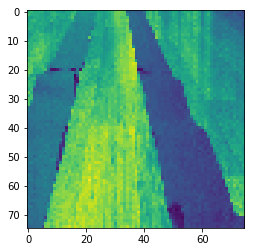

In [31]:
plt.imshow(img)

In [14]:
imgData = np.array(img)
imgData.shape

(75, 75)

In [34]:
imgData.flatten().shape

(5625,)

In [15]:
X=np.array([[imgData], [imgData]], dtype=np.int32)

In [16]:
X.shape

(2, 1, 75, 75)

In [17]:
imgData.shape

(75, 75)

In [18]:
trainData=[]

In [19]:
trainData.append([imgData, 1])

In [20]:
trainData.count

<function list.count>

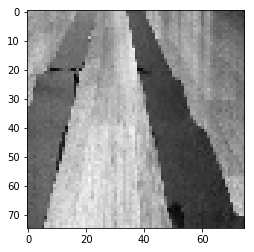

In [21]:
plt.imshow(trainData[0][0], cmap = 'gist_gray')

# Actual Model Implementation begins here...

# Define the labels the model is going to train and test

In [22]:
counting_dict = {'forward': 0, 'reverse': 0, 'left': 0, 'right': 0, 'idle':0}
naming_dict = {'forward': 0, 'reverse': 0, 'left': 0, 'right': 0, 'idle':0}
IMG_SIZE = 75

# Convert the labels to one hot encoding vectors

In [23]:
def label_img(name):
    word_label = name.split('-')[0]
    if word_label == 'forward': return np.array([1,0,0,0, 0])
    elif word_label == 'reverse' : return np.array([0,1,0,0, 0])
    elif word_label == 'left' : return np.array([0,0,1,0, 0])
    elif word_label == 'right' : return np.array([0,0,0,1, 0])
    elif word_label == 'idle' : return np.array([0,0,0,0, 1])

# clean the raw data and prepare training folder

In [24]:
def clean_raw_image():
    for labels in naming_dict.keys():
        for img in os.listdir('./raw_data/'+labels):
          label = labels
          counting_dict[label] += 1
          path = os.path.join('./raw_data/'+labels, img)
          saveName = './train/' + label + '-' + str(counting_dict[label]) + '.jpg'
          print(saveName)
          image_data = np.array(Image.open(path))
          imageio.imwrite(saveName, image_data)

# Invokes/executes the above the clean raw image function above
## your working folder should have an empty folder called 'train'
## After the incocation, you working folder should have a folder called 'train'

In [25]:
clean_raw_image()

./train/forward-1.jpg
./train/forward-2.jpg
./train/forward-3.jpg
./train/forward-4.jpg
./train/forward-5.jpg
./train/forward-6.jpg
./train/forward-7.jpg
./train/forward-8.jpg
./train/forward-9.jpg
./train/forward-10.jpg
./train/forward-11.jpg
./train/forward-12.jpg
./train/forward-13.jpg
./train/forward-14.jpg
./train/forward-15.jpg
./train/forward-16.jpg
./train/forward-17.jpg
./train/forward-18.jpg
./train/forward-19.jpg
./train/forward-20.jpg
./train/forward-21.jpg
./train/forward-22.jpg
./train/forward-23.jpg
./train/forward-24.jpg
./train/forward-25.jpg
./train/forward-26.jpg
./train/forward-27.jpg
./train/forward-28.jpg
./train/forward-29.jpg
./train/forward-30.jpg
./train/forward-31.jpg
./train/forward-32.jpg
./train/forward-33.jpg
./train/forward-34.jpg
./train/forward-35.jpg
./train/forward-36.jpg
./train/forward-37.jpg
./train/forward-38.jpg
./train/forward-39.jpg
./train/forward-40.jpg
./train/forward-41.jpg
./train/forward-42.jpg
./train/forward-43.jpg
./train/forward-44.j

./train/forward-354.jpg
./train/forward-355.jpg
./train/forward-356.jpg
./train/forward-357.jpg
./train/forward-358.jpg
./train/forward-359.jpg
./train/forward-360.jpg
./train/forward-361.jpg
./train/forward-362.jpg
./train/forward-363.jpg
./train/forward-364.jpg
./train/forward-365.jpg
./train/forward-366.jpg
./train/forward-367.jpg
./train/forward-368.jpg
./train/forward-369.jpg
./train/forward-370.jpg
./train/forward-371.jpg
./train/forward-372.jpg
./train/forward-373.jpg
./train/forward-374.jpg
./train/forward-375.jpg
./train/forward-376.jpg
./train/forward-377.jpg
./train/forward-378.jpg
./train/forward-379.jpg
./train/forward-380.jpg
./train/forward-381.jpg
./train/forward-382.jpg
./train/forward-383.jpg
./train/forward-384.jpg
./train/forward-385.jpg
./train/forward-386.jpg
./train/forward-387.jpg
./train/forward-388.jpg
./train/forward-389.jpg
./train/forward-390.jpg
./train/forward-391.jpg
./train/forward-392.jpg
./train/forward-393.jpg
./train/forward-394.jpg
./train/forward-

./train/forward-704.jpg
./train/forward-705.jpg
./train/forward-706.jpg
./train/forward-707.jpg
./train/forward-708.jpg
./train/forward-709.jpg
./train/forward-710.jpg
./train/forward-711.jpg
./train/forward-712.jpg
./train/forward-713.jpg
./train/forward-714.jpg
./train/forward-715.jpg
./train/forward-716.jpg
./train/forward-717.jpg
./train/forward-718.jpg
./train/forward-719.jpg
./train/forward-720.jpg
./train/forward-721.jpg
./train/forward-722.jpg
./train/forward-723.jpg
./train/forward-724.jpg
./train/forward-725.jpg
./train/forward-726.jpg
./train/forward-727.jpg
./train/forward-728.jpg
./train/forward-729.jpg
./train/forward-730.jpg
./train/forward-731.jpg
./train/forward-732.jpg
./train/forward-733.jpg
./train/forward-734.jpg
./train/forward-735.jpg
./train/forward-736.jpg
./train/forward-737.jpg
./train/forward-738.jpg
./train/forward-739.jpg
./train/forward-740.jpg
./train/forward-741.jpg
./train/forward-742.jpg
./train/forward-743.jpg
./train/forward-744.jpg
./train/forward-

./train/right-36.jpg
./train/right-37.jpg
./train/right-38.jpg
./train/right-39.jpg
./train/right-40.jpg
./train/right-41.jpg
./train/right-42.jpg
./train/right-43.jpg
./train/right-44.jpg
./train/right-45.jpg
./train/right-46.jpg
./train/right-47.jpg
./train/right-48.jpg
./train/right-49.jpg
./train/right-50.jpg
./train/right-51.jpg
./train/right-52.jpg
./train/right-53.jpg
./train/right-54.jpg
./train/right-55.jpg
./train/right-56.jpg
./train/right-57.jpg
./train/right-58.jpg
./train/right-59.jpg
./train/right-60.jpg
./train/right-61.jpg
./train/right-62.jpg
./train/right-63.jpg
./train/right-64.jpg
./train/right-65.jpg
./train/right-66.jpg
./train/right-67.jpg
./train/right-68.jpg
./train/right-69.jpg
./train/right-70.jpg
./train/right-71.jpg
./train/right-72.jpg
./train/right-73.jpg
./train/right-74.jpg
./train/right-75.jpg
./train/right-76.jpg
./train/right-77.jpg
./train/right-78.jpg
./train/right-79.jpg
./train/right-80.jpg
./train/right-81.jpg
./train/right-82.jpg
./train/right

./train/idle-115.jpg
./train/idle-116.jpg
./train/idle-117.jpg
./train/idle-118.jpg
./train/idle-119.jpg
./train/idle-120.jpg
./train/idle-121.jpg
./train/idle-122.jpg
./train/idle-123.jpg
./train/idle-124.jpg
./train/idle-125.jpg
./train/idle-126.jpg
./train/idle-127.jpg
./train/idle-128.jpg
./train/idle-129.jpg
./train/idle-130.jpg
./train/idle-131.jpg
./train/idle-132.jpg
./train/idle-133.jpg
./train/idle-134.jpg
./train/idle-135.jpg
./train/idle-136.jpg
./train/idle-137.jpg
./train/idle-138.jpg
./train/idle-139.jpg
./train/idle-140.jpg
./train/idle-141.jpg
./train/idle-142.jpg
./train/idle-143.jpg
./train/idle-144.jpg
./train/idle-145.jpg
./train/idle-146.jpg
./train/idle-147.jpg
./train/idle-148.jpg
./train/idle-149.jpg
./train/idle-150.jpg
./train/idle-151.jpg
./train/idle-152.jpg
./train/idle-153.jpg
./train/idle-154.jpg
./train/idle-155.jpg
./train/idle-156.jpg
./train/idle-157.jpg
./train/idle-158.jpg
./train/idle-159.jpg
./train/idle-160.jpg
./train/idle-161.jpg
./train/idle-

./train/idle-515.jpg
./train/idle-516.jpg
./train/idle-517.jpg
./train/idle-518.jpg
./train/idle-519.jpg
./train/idle-520.jpg
./train/idle-521.jpg
./train/idle-522.jpg
./train/idle-523.jpg
./train/idle-524.jpg
./train/idle-525.jpg
./train/idle-526.jpg
./train/idle-527.jpg
./train/idle-528.jpg
./train/idle-529.jpg
./train/idle-530.jpg
./train/idle-531.jpg
./train/idle-532.jpg
./train/idle-533.jpg
./train/idle-534.jpg
./train/idle-535.jpg
./train/idle-536.jpg
./train/idle-537.jpg
./train/idle-538.jpg
./train/idle-539.jpg
./train/idle-540.jpg
./train/idle-541.jpg
./train/idle-542.jpg
./train/idle-543.jpg
./train/idle-544.jpg
./train/idle-545.jpg
./train/idle-546.jpg
./train/idle-547.jpg
./train/idle-548.jpg
./train/idle-549.jpg
./train/idle-550.jpg
./train/idle-551.jpg
./train/idle-552.jpg
./train/idle-553.jpg
./train/idle-554.jpg
./train/idle-555.jpg
./train/idle-556.jpg
./train/idle-557.jpg
./train/idle-558.jpg
./train/idle-559.jpg
./train/idle-560.jpg
./train/idle-561.jpg
./train/idle-

# Load the data from train folder

In [26]:
IMG_SIZE = 75
DIR = './train'
def load_training_data():
    train_data = []
    for img in os.listdir(DIR):
        label = label_img(img)
        path = os.path.join(DIR, img)
        if "DS_Store" not in path:
            img = Image.open(path)
            img = img.convert('L')
            img = img.resize((IMG_SIZE, IMG_SIZE), Image.ANTIALIAS)
            train_data.append([np.array(img), label])
            
    shuffle(train_data)
    return train_data

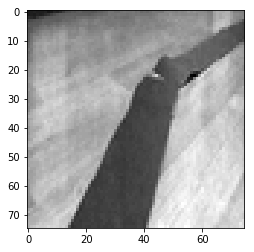

In [28]:
train_data = load_training_data()
plt.imshow(train_data[34][0], cmap = 'gist_gray')

In [29]:
np.array(train_data[0][0]).reshape(-1, IMG_SIZE, IMG_SIZE, 1).shape

(1, 75, 75, 1)

In [30]:
np.array(train_data[1][0]).reshape(-1, IMG_SIZE, IMG_SIZE, 1).shape

(1, 75, 75, 1)

In [31]:
train_data[0][0]

array([[53, 51, 56, ..., 56, 51, 48],
       [51, 53, 58, ..., 57, 51, 51],
       [56, 57, 59, ..., 60, 54, 56],
       ...,
       [46, 47, 49, ..., 42, 50, 85],
       [50, 48, 47, ..., 46, 42, 64],
       [48, 47, 48, ..., 45, 44, 50]], dtype=uint8)

# The loaded data has both input and output labels
## the below separates out input and output into two different arrays

In [32]:
trainImages = np.array([i[0] for i in train_data]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
trainLabels = np.array([i[1] for i in train_data])

In [33]:
trainImages.shape

(2106, 75, 75, 1)

In [34]:
trainLabels.shape

(2106, 5)

In [35]:
trainLabels[786]

array([1, 0, 0, 0, 0])

# Build the CNN model

In [37]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers. normalization import BatchNormalization
import numpy as np

Using TensorFlow backend.


In [39]:
from keras.models import model_from_json

In [40]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
#model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(BatchNormalization())
#model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.3))
model.add(Dense(5, activation = 'softmax'))

In [41]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])

# fit the model

In [42]:
model_hist = model.fit(trainImages, trainLabels, batch_size = 50, epochs = 5, verbose = 1)

Epoch 1/5
2106/2106 [==============================] - 32s 15ms/step - loss: 0.1980 - acc: 0.9394
Epoch 2/5
2106/2106 [==============================] - 29s 14ms/step - loss: 0.1003 - acc: 0.9623
Epoch 3/5
2106/2106 [==============================] - 30s 14ms/step - loss: 0.0875 - acc: 0.9684
Epoch 4/5
2106/2106 [==============================] - 29s 14ms/step - loss: 0.0673 - acc: 0.9747
Epoch 5/5
2106/2106 [==============================] - 29s 14ms/step - loss: 0.0687 - acc: 0.9767


# load test data

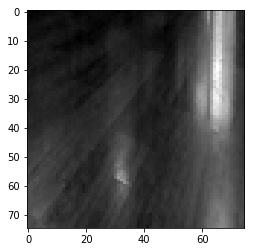

In [43]:
# Test on Test Set
TEST_DIR = './test'
def load_test_data():
    test_data = []
    for img in os.listdir(TEST_DIR):
        label = label_img(img)
        path = os.path.join(TEST_DIR, img)
        if "DS_Store" not in path:
            img = Image.open(path)
            img = img.convert('L')
            img = img.resize((IMG_SIZE, IMG_SIZE), Image.ANTIALIAS)
            test_data.append([np.array(img), label])
    shuffle(test_data)
    return test_data


test_data = load_test_data()    
plt.imshow(test_data[10][0], cmap = 'gist_gray')

# evaluate the model

In [44]:
testImages = np.array([i[0] for i in test_data]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
testLabels = np.array([i[1] for i in test_data])



## Evaluate the test images

In [45]:
loss, acc = model.evaluate(testImages, testLabels, verbose = 0)
print(acc * 100)

95.76922838504498


In [46]:
testImages[0].shape

(75, 75, 1)

# Predict the model

In [47]:
def get_label_from_result(result):
    label=''
    if(np.argmax(result) ==0):
        label='forward'
    elif(np.argmax(result)==1):
        label='reverse'
    elif(np.argmax(result)==2):
        label='left'
    elif(np.argmax(result)==3):
        label='right'
    elif(np.argmax(result)==4):
        label='idle'
    return label

# Predict individual using a specific image

In [48]:
train_data=[]
img = Image.open('./test/right-290.jpg')
img = img.convert('L')
img = img.resize((IMG_SIZE, IMG_SIZE), Image.ANTIALIAS)
train_data.append(np.array(img))
img1 = train_data[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1)
result = model.predict(img1)
print(result)
print(np.argmax(result))
print(get_label_from_result(result))

img = Image.open('./test/forward-93.jpg')
img = img.convert('L')
img = img.resize((IMG_SIZE, IMG_SIZE), Image.ANTIALIAS)
train_data.append(np.array(img))
img1 = train_data[1].reshape(-1, IMG_SIZE, IMG_SIZE, 1)
result = model.predict(img1)
print(result)
print(np.argmax(result))
print(get_label_from_result(result))




[[2.5523303e-07 1.3550338e-12 2.0843932e-07 9.9999952e-01 9.6223118e-09]]
3
right
[[9.9994123e-01 7.1926536e-09 5.0313436e-05 8.2862580e-06 1.4946832e-07]]
0
forward


# Now predict the model output for all images in 'test' folder

In [49]:
i = 0
for img in testImages:
    #print(img.shape)
    result = model.predict(img.reshape(-1,75,75,1))
    #print(result)
    #print(np.argmax(result))
    print('Predicted: ' + get_label_from_result(result) + ', Actual: ' + get_label_from_result(testLabels[i]))
    i = i +1


    

Predicted: idle, Actual: idle
Predicted: idle, Actual: idle
Predicted: left, Actual: left
Predicted: forward, Actual: left
Predicted: left, Actual: left
Predicted: forward, Actual: forward
Predicted: left, Actual: left
Predicted: idle, Actual: idle
Predicted: idle, Actual: idle
Predicted: idle, Actual: idle
Predicted: idle, Actual: idle
Predicted: idle, Actual: idle
Predicted: right, Actual: right
Predicted: left, Actual: left
Predicted: right, Actual: right
Predicted: right, Actual: right
Predicted: forward, Actual: forward
Predicted: forward, Actual: right
Predicted: forward, Actual: left
Predicted: left, Actual: left
Predicted: left, Actual: left
Predicted: idle, Actual: idle
Predicted: forward, Actual: forward
Predicted: right, Actual: right
Predicted: forward, Actual: forward
Predicted: right, Actual: right
Predicted: left, Actual: left
Predicted: left, Actual: left
Predicted: right, Actual: right
Predicted: forward, Actual: forward
Predicted: idle, Actual: idle
Predicted: idle, A

# Save the model to the disk
## the saved model is reloaded from the disk


In [50]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")
 
# later...
 
# load json and create model
#json_file = open('model.json', 'r')
#loaded_model_json = json_file.read()
#json_file.close()
#loaded_model = model_from_json(loaded_model_json)
# load weights into new model
#loaded_model.load_weights("model.h5")
#print("Loaded model from disk")
 
# evaluate loaded model on test data
#loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
#loss, acc = model.evaluate(testImages, testLabels, verbose = 0)
#print(acc * 100)
#score = loaded_model.evaluate(X, Y, verbose=0)
#print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Saved model to disk


# Reload the saved mode from the disk
## then compile and evaluate it

In [51]:
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])
#loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
loss, acc = loaded_model.evaluate(testImages, testLabels, verbose = 0)
print(acc * 100)
#score = loaded_model.evaluate(X, Y, verbose=0)
#print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
95.76922838504498


### using the loaded model, it predicts the model output for all images stored in 'train' folder

In [52]:
i = 0
for img in testImages:
    #print(img.shape)
    result = loaded_model.predict(img.reshape(-1,75,75,1))
    #print(result)
    #print(np.argmax(result))
    print('Predicted: ' + get_label_from_result(result) + ', Actual: ' + get_label_from_result(testLabels[i]))
    i = i +1

Predicted: idle, Actual: idle
Predicted: idle, Actual: idle
Predicted: left, Actual: left
Predicted: forward, Actual: left
Predicted: left, Actual: left
Predicted: forward, Actual: forward
Predicted: left, Actual: left
Predicted: idle, Actual: idle
Predicted: idle, Actual: idle
Predicted: idle, Actual: idle
Predicted: idle, Actual: idle
Predicted: idle, Actual: idle
Predicted: right, Actual: right
Predicted: left, Actual: left
Predicted: right, Actual: right
Predicted: right, Actual: right
Predicted: forward, Actual: forward
Predicted: forward, Actual: right
Predicted: forward, Actual: left
Predicted: left, Actual: left
Predicted: left, Actual: left
Predicted: idle, Actual: idle
Predicted: forward, Actual: forward
Predicted: right, Actual: right
Predicted: forward, Actual: forward
Predicted: right, Actual: right
Predicted: left, Actual: left
Predicted: left, Actual: left
Predicted: right, Actual: right
Predicted: forward, Actual: forward
Predicted: idle, Actual: idle
Predicted: idle, A